## Load saved results for visualization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np
import os

font_config = {'font.size': 14, 'font.family': 'Times New Roman'}
plt.rcParams.update(font_config)
plt.rcParams["figure.figsize"] = (6.4, 3.2)

datasets = ['cora', 'flickr', 'reddit2', 'arxiv']
models = ['GCN', 'SAGE', 'MLP', 'GCN_MLP', 'SAGE_MLP']
manners = ['GD', 'GD_Diff', 'Ada_GD_Diff', 'EDG', 'EDG_Plus']
criterion = 'wrong2correct'
ROOT = '/home/grads/z/zhimengj/Code/edit_gnn/finetune'

summary = {}
for dataset in datasets:
    summary[dataset] = {}
    for manner in manners:
        summary[dataset][manner] = {}
        for model in models:
            if 'EDG' is not in manner: 
                file_name = f'{ROOT}/{dataset}/{manner}/{model}_{criterion}_eval.json'
            elif manner=='EDG':
                file_name = f'{ROOT}/{dataset}/{manner}/{model}_{criterion}_eval_gamma=5.0.json'
            else:
                file_name = f'{ROOT}/{dataset}/{manner}/{model}_{criterion}_eval_split=2_gamma=5.0.json'
            with open(file_name, 'r') as f:
                summary[dataset][manner][model] = json.load(f)
# print(summary)

FileNotFoundError: [Errno 2] No such file or directory: '/home/grads/z/zhimengj/Code/edit_gnn/finetune/cora/GD_Diff/GCN_wrong2correct_eval.json'

In [ ]:
def plot_manners(summary, datasets, model='GCN'):
    fig = plt.figure()
    num_datasets = len(datasets)

    edit_way = 'ind_edit'
    metric = 'val_drawdown'

    gathered_data = []
    # model = 'GCN'
    for idx, manner in enumerate(manners):    
        data = [summary[dataset][manner][model][edit_way][metric] for dataset in datasets]
        gathered_data.append(data)

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    step_size = 1. / num_datasets 
    X = np.arange(num_datasets)

    title_mapping = {'ind_edit': '50 independent edit', 'seq_edit': '50 sequential edit', 'batch_edit': 'batch edit with batch size 50'}
    for i in range(num_datasets - 1):
        ax.bar(X + step_size * i, gathered_data[i], width = step_size)

    ax.set_xticks(X + step_size)
    ax.set_xticklabels(datasets)
    ax.set_yticks(np.arange(0., 50., 5.))
    ax.set_ylabel(f'{metric} (%)')
    ax.set_xlabel(f'{title_mapping[edit_way]}')
    ax.grid()
    ax.legend(manners)

<Figure size 460.8x230.4 with 0 Axes>

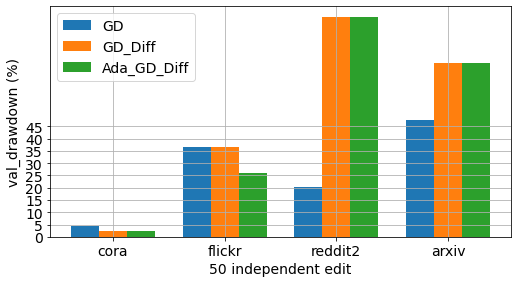

<Figure size 460.8x230.4 with 0 Axes>

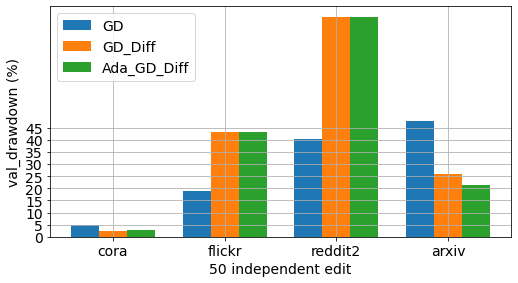

<Figure size 460.8x230.4 with 0 Axes>

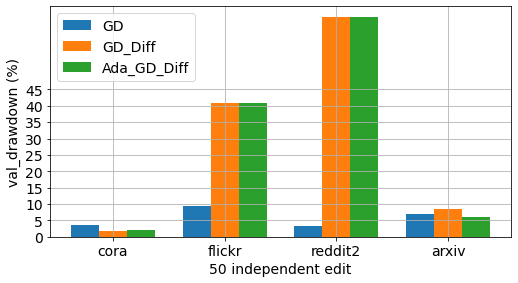

In [ ]:
for model in models:
    plot_manners(summary, datasets, model)

In [ ]:
fig = plt.figure()
num_datasets = len(datasets)

edit_way = 'ind_edit'
metric = 'val_drawdown'

gathered_data = []
model = 'GCN'
for idx, manner in enumerate(manners):    
    data = [summary[dataset][manner][model][edit_way][metric] for dataset in datasets]
    gathered_data.append(data)


<Figure size 460.8x230.4 with 0 Axes>

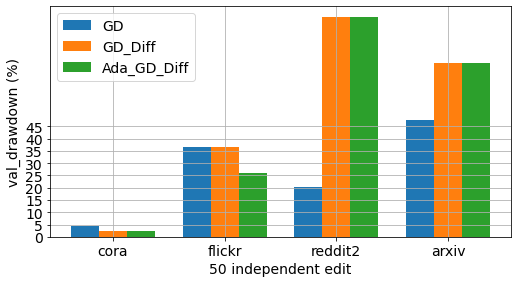

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
step_size = 1. / num_datasets 
X = np.arange(num_datasets)

title_mapping = {'ind_edit': '50 independent edit', 'seq_edit': '50 sequential edit', 'batch_edit': 'batch edit with batch size 50'}
for i in range(num_datasets - 1):
    ax.bar(X + step_size * i, gathered_data[i], width = step_size)

ax.set_xticks(X + step_size)
ax.set_xticklabels(datasets)
ax.set_yticks(np.arange(0., 50., 5.))
ax.set_ylabel(f'{metric} (%)')
ax.set_xlabel(f'{title_mapping[edit_way]}')
ax.grid()
ax.legend(manners)
